In [2]:
# Importing the dataset
import pandas as pd
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# Data preparation
from sklearn import preprocessing
le_species=preprocessing.LabelEncoder()
df['Species']=le_species.fit_transform(df['Species'])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [6]:
# Training the model
from sklearn import tree
from sklearn.model_selection import train_test_split
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y=df[['Species']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [7]:
model=tree.DecisionTreeClassifier()

In [8]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [9]:
# Testing the model
predicted=model.predict(X_test)

In [10]:
actual=Y_test

In [11]:
# Evaluating the model
from sklearn import metrics
accuracy=metrics.accuracy_score(actual,predicted)
accuracy

0.9

In [12]:
model.predict([[3.4,4.8,1.2,3.9]])

array([0])

In [14]:
# Visualing the Decision Tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

<Figure size 1800x1440 with 0 Axes>

[Text(418.5, 498.3, 'X[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(354.11538461538464, 407.70000000000005, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(482.8846153846154, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(257.53846153846155, 317.1, 'X[2] <= 4.95\ngini = 0.21\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(128.76923076923077, 226.5, 'X[0] <= 5.0\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(64.38461538461539, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(193.15384615384616, 135.89999999999998, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(386.3076923076923, 226.5, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(321.9230769230769, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 135.89999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(386.3076923076923, 45.2

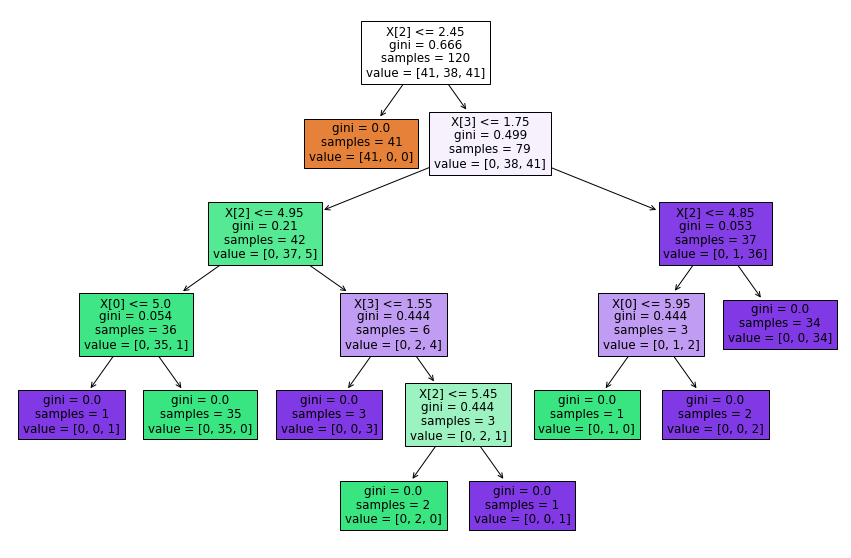

In [20]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [21]:
print(tree.export_text(model))

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_0 <= 5.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  5.00
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2

